In [31]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt

In [15]:
df_orig = pd.read_hdf("btc_data.hdf", "table")

### Делим данные на выборки

In [16]:
df = df_orig.sample(frac=1)

In [17]:
train_from, train_to = 0, int(len(df) * 0.7)
valid_from, valid_to = train_to + 1, int(len(df) * 0.85)
test_from, test_to = valid_to + 1, len(df)

In [18]:
print(f"train: {train_from},\t {train_to}")
print(f"valid: {valid_from},\t {valid_to}")
print(f"test:  {test_from},\t {test_to}")
train = df[train_from:train_to + 1]
valid = df[valid_from:valid_to + 1]
test = df[test_from:test_to + 1]

train: 0,	 2002339
valid: 2002340,	 2431412
test:  2431413,	 2860485


In [19]:
train_perc = len(train[train["open"] > train["close"]]) / len(train)
valid_perc = len(valid[valid["open"] > valid["close"]]) / len(valid)
test_perc = len(test[test["open"] > test["close"]]) / len(test)
print(f"train%: {train_perc}")
print(f"valid%: {valid_perc}")
print(f"test%: {test_perc}")

train%: 0.46527213160602093
valid%: 0.4649535160683613
test%: 0.46593112577842416


In [20]:
train.columns

Index(['timestamp', 'unixtimestamp', 'open', 'high', 'low', 'close',
       'volume_btc', 'volume_usd', 'weighted_price', 'sma14', 'sma30', 'ema12',
       'ema26', 'macd', 'obv', 'ad', 'adx', 'aaron', 'rsi', 'so', 'open_prev1',
       'high_prev1', 'low_prev1', 'close_prev1', 'volume_btc_prev1',
       'volume_usd_prev1', 'weighted_price_prev1', 'sma14_prev1',
       'sma30_prev1', 'ema12_prev1', 'ema26_prev1', 'macd_prev1', 'obv_prev1',
       'ad_prev1', 'adx_prev1', 'aaron_prev1', 'rsi_prev1', 'so_prev1',
       'open_rel', 'high_rel', 'low_rel', 'close_rel', 'volume_btc_rel',
       'volume_usd_rel', 'weighted_price_rel', 'sma14_rel', 'sma30_rel',
       'ema12_rel', 'ema26_rel', 'macd_rel', 'obv_rel', 'ad_rel', 'adx_rel',
       'aaron_rel', 'rsi_rel', 'so_rel', 'open_rel_prev1', 'high_rel_prev1',
       'low_rel_prev1', 'close_rel_prev1', 'volume_btc_rel_prev1',
       'volume_usd_rel_prev1', 'weighted_price_rel_prev1', 'sma14_rel_prev1',
       'sma30_rel_prev1', 'ema12_rel_pre

In [23]:
train_columns = ['open', 'open_prev1',
       'high_prev1', 'low_prev1', 'close_prev1', 'volume_btc_prev1',
       'volume_usd_prev1', 'weighted_price_prev1', 'open_rel', 'high_rel_prev1',
       'low_rel_prev1', 'close_rel_prev1', 'volume_btc_rel_prev1', 'volume_usd_rel_prev1',
       'weighted_price_rel_prev1', 'sma14_prev1', 'sma30_prev1', 'ema12_prev1',
       'ema26_prev1', 'macd_prev1', 'obv_prev1', 'ad_prev1', 'adx_prev1',
       'aaron_prev1', 'rsi_prev1', 'so_prev1', 'sma14_rel_prev1', 'sma30_rel_prev1',
       'ema12_rel_prev1', 'ema26_rel_prev1', 'macd_rel_prev1', 'obv_rel_prev1', 'ad_rel_prev1', 'adx_rel_prev1',
       'aaron_rel_prev1', 'rsi_rel_prev1', 'so_rel_prev1']

In [27]:
X_train = train[train_columns]
Y_train = train["close"] > train["open"]

X_valid = valid[train_columns]
Y_valid = valid["close"] > valid["open"]

In [29]:
model_class = XGBClassifier(use_label_encoder=False)

model_class.fit(
        X_train, 
        Y_train, 
        eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
        verbose=True,         
        eval_metric='error',
        early_stopping_rounds = 10)

/Users/abukata/opt/anaconda3/envs/trading-bot-env/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.45437	validation_1-error:0.45592
[1]	validation_0-error:0.44983	validation_1-error:0.45157
[2]	validation_0-error:0.44856	validation_1-error:0.45040
[3]	validation_0-error:0.44602	validation_1-error:0.44759
[4]	validation_0-error:0.44452	validation_1-error:0.44649
[5]	validation_0-error:0.44395	validation_1-error:0.44588
[6]	validation_0-error:0.44313	validation_1-error:0.44522
[7]	validation_0-error:0.44216	validation_1-error:0.44400
[8]	validation_0-error:0.44140	validation_1-error:0.44352
[9]	validation_0-error:0.44080	validation_1-error:0.44310
[10]	validation_0-error:0.43990	validation_1-error:0.44217
[11]	validation_0-error:0.43922	validation_1-error:0.44152
[12]	validation_0-error:0.43865	validation_1-error:0.44113
[13]	validation_0-error:0.43805	validation_1-error:0.44055
[14]	validation_0-error:0.43776	validation_1-error:0.44047
[15]	validation_0-error:0.43735	validation_1-error:0.44061
[16]	validation_0-error:0.43695	validation_1-error:0.44013
[17]	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Default model feature importance'}, xlabel='F score', ylabel='Features'>

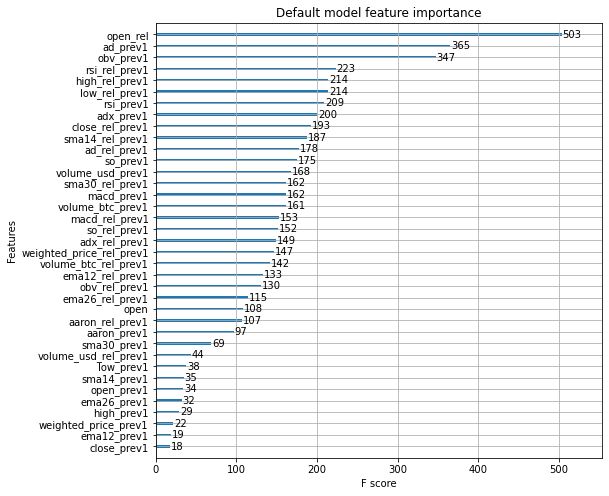

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
plot_importance(booster=model_class, ax=ax, title='Default model feature importance', max_num_features=40)